In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

importing dataset

In [7]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 1]].values
y = dataset.iloc[:, 2].values

In [9]:
X

array([[ 19000,     19],
       [ 20000,     35],
       [ 43000,     26],
       [ 57000,     27],
       [ 76000,     19],
       [ 58000,     27],
       [ 84000,     27],
       [150000,     32],
       [ 33000,     25],
       [ 65000,     35],
       [ 80000,     26],
       [ 52000,     26],
       [ 86000,     20],
       [ 18000,     32],
       [ 82000,     18],
       [ 80000,     29],
       [ 25000,     47],
       [ 26000,     45],
       [ 28000,     46],
       [ 29000,     48],
       [ 22000,     45],
       [ 49000,     47],
       [ 41000,     48],
       [ 22000,     45],
       [ 23000,     46],
       [ 20000,     47],
       [ 28000,     49],
       [ 30000,     47],
       [ 43000,     29],
       [ 18000,     31],
       [ 74000,     31],
       [137000,     27],
       [ 16000,     21],
       [ 44000,     28],
       [ 90000,     27],
       [ 27000,     35],
       [ 28000,     33],
       [ 49000,     30],
       [ 72000,     26],
       [ 31000,     27],


Using The Elbow Method to Find The Optimmal Number Of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

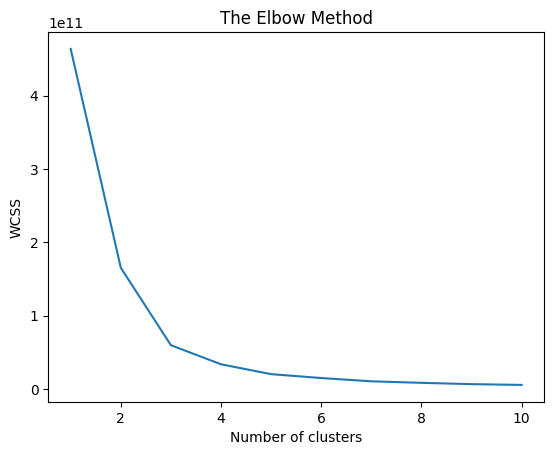

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Training the K-Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


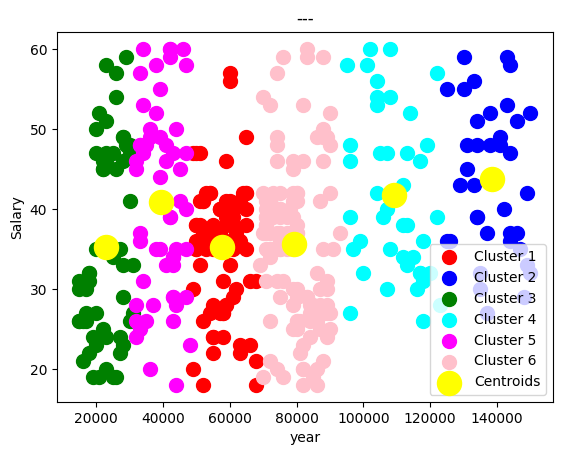

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('---')
plt.xlabel('year')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [14]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.4779454628831239
